# Use Historical NOAA Bouy Data to forecast waves

## San Francisco local bouys 

cali = CALIFORNIA - 357NM West of San Francisco, CA. Station ID: 46059

bb = BODEGA BAY - 48NM North Northwest of San Francisco, CA.Station ID: 46013

sf = SAN FRANCISCO - 18NM West of San Francisco, CA. Station ID: 46026

hmb = HALF MOON BAY - 24NM South Southwest of San Francisco, CA Station ID: 46012

<img src="attachments/Screen%20Shot%202017-10-10%20at%209.50.47%20AM.png">

# Gathering local wave and weather data from National Oceananic and Atmospheric Administraiton bouys. 

[Historical Bouy data](http://www.ndbc.noaa.gov/historical_data.shtml)

[Measurement descriptions](http://www.ndbc.noaa.gov/measdes.shtml#stdmet)

[Map of all available Bouys](https://www.nodc.noaa.gov/BUOY/)

## Bouy file syntax
xxxxxtyyyy

xxxxx=Bouy ID number

t=data type 

yyyy= year

## Data type 
h= Standard Meterological

c= Continuous Winds

a= Ocean Current Data

o= Oceanographic Data

w=Spectral wave density

d= Spectral wave (alpha1) direction data

i= Spectral wave (alpha2) direction data

j= Spectral wave (r1) direction data

k= Spectral wave (r2) direction data

t= Water-column Height (Tsunameters using DART® technology)


In [1]:
import numpy
import netCDF4
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

### Get wave data 

In [2]:
#2015 SF data
url='http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h2015.txt.gz&dir=data/historical/stdmet/'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
sf_2015 = pd.read_fwf(url, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])

In [3]:
#2016 SF data
url='http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h2016.txt.gz&dir=data/historical/stdmet/'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
sf_2016 = pd.read_fwf(url, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])

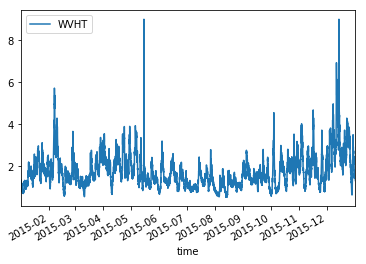

In [4]:
sf_2015.plot(x='time',y='WVHT')

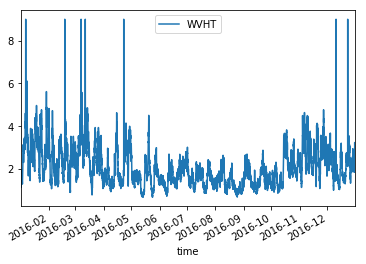

In [5]:
sf_2016.plot(x='time',y='WVHT')

In [11]:
url='http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h2015.txt.gz&dir=data/historical/stdmet/'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
bouy_data = []
for y in range(2014,2015):
    path = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h'+str(y)+'.txt.gz&dir=data/historical/stdmet/'
    df = pd.read_fwf(path, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])
    bouy_data.append(df)

sf_bouy_data = pd.concat(bouy_data)

In [112]:
#Get all SF bouy data

bouy_col_names=['#YY','MM','DD','hh','mm','WDIR','WSPD','GST','WVHT','DPD',
                'APD','MWD','PRES','ATMP','WTMP','DEWP','VIS','TIDE']
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
bouy_data =pd.DataFrame()

for y in range(2014,2016):
    path = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h'+str(y)+'.txt.gz&dir=data/historical/stdmet/'
    df = pd.read_fwf(path,names=bouy_col_names,parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[0,1])
    bouy_data.append(df)

    


""


In [91]:
#Get 2015 Data
y='2015'
bouy_col_names=['#YY','MM','DD','hh','mm','WDIR','WSPD','GST','WVHT','DPD',
                'APD','MWD','PRES','ATMP','WTMP','DEWP','VIS','TIDE']
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
path = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h'+str(y)+'.txt.gz&dir=data/historical/stdmet/'
sf_bouy_data_2015 = pd.read_fwf(path,
                                names=bouy_col_names,
                                parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, 
                                date_parser=dateparse, 
                                skiprows=[0,1]
                               )

In [92]:
#Get 2016 Data
y='2016'
bouy_col_names=['#YY','MM','DD','hh','mm','WDIR','WSPD','GST','WVHT','DPD',
                'APD','MWD','PRES','ATMP','WTMP','DEWP','VIS','TIDE']
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
path = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h'+str(y)+'.txt.gz&dir=data/historical/stdmet/'
sf_bouy_data_2016 = pd.read_fwf(path,
                                names=bouy_col_names,
                                parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, 
                                date_parser=dateparse, 
                                skiprows=[0,1]
                               )

In [93]:
#Append
bouy_data =pd.DataFrame()

In [94]:
bouy_data= bouy_data.append(sf_bouy_data_2015)

In [96]:
bouy_data= bouy_data.append(sf_bouy_data_2016)

In [99]:
bouy_data.tail()

,time,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
8650,2016-12-31 18:50:00,80,6.7,8.7,2.42,11.43,7.75,303,1014.1,9.2,10.7,999.0,99.0,99.0
8651,2016-12-31 19:50:00,73,7.8,9.4,2.37,12.12,7.50,287,1014.0,9.6,10.8,999.0,99.0,99.0
8652,2016-12-31 20:50:00,59,7.1,8.6,2.44,12.90,7.66,285,1013.8,9.6,10.8,999.0,99.0,99.0
8653,2016-12-31 21:50:00,69,5.2,6.4,2.29,12.90,8.18,285,1013.4,9.5,10.8,999.0,99.0,99.0
8654,2016-12-31 22:50:00,43,3.0,3.7,2.25,13.79,8.48,277,1013.9,9.8,10.8,999.0,99.0,99.0
